# Clean Indatabet-Free-Odds Data

In [1]:
import pathlib
import sys
import datetime

import numpy as np
import pandas as pd
from pyxlsb import open_workbook as open_xlsb
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1
# add the 'src' directory to path to import modules
src_dir = pathlib.Path().cwd().resolve().parent / 'src'
#src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)
# import my class code from the source
# %aimport src-dir.filename

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

PROJECT_DIR = pathlib.Path().cwd().resolve().parent

RAW_DATA_DIR = PROJECT_DIR / 'data' / '01-raw'
CLEANED_DIR = PROJECT_DIR / 'data' / '02-cleaned'

## Compile Premier League Data

In [2]:
ODDS_DATA_FP = RAW_DATA_DIR / 'indatabet-free-download' / 'oOo FT_2in1_Pinnacle & bet365_ML TG_01 April 2019.xlsb'

print(ODDS_DATA_FP)
save_file_name = 'indatabet-free-odds.csv'

/media/david/5C14F53A14F517AA/code/ana_py37/projects/soccer-predictions/data/01-raw/indatabet-free-download/oOo FT_2in1_Pinnacle & bet365_ML TG_01 April 2019.xlsb


In [3]:
# https://stackoverflow.com/questions/45019778/read-xlsb-file-in-pandas-python
# Open xlsb file format
df = []

with open_xlsb(ODDS_DATA_FP) as wb:
    with wb.get_sheet(1) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

odds = pd.DataFrame(df[1:], columns=df[0])
odds.columns = odds.columns.str.lower()
odds.head()

,yy,dd,mm,date,id (fifa),country,league,season,teams,None,1st half scores,None,None,None,2nd half scores,None,None,None,final scores,None,None,None,et/pen/awd,ft moneyline,None,None,"payout, %",ft moneyline,None,None,"payout, %",ft tg 2.5,None,ft tg 2.5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0,NaN,NaN,None,None,None,None,None,None,Home,Away,H,A,R,1.5,H,A,R,1.5,H,A,R,2.5,None,pinnacle,None,None,None,bet365,None,None,None,pinnacle,None,bet365,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,H,D,A,O,H,D,A,O,O,U,O,U,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2019.0,31.0,Mar,31/3/2019,ARG D1,Argentina,Primera Division,2018/2019,Defensa y Justicia,Union de Santa Fe,0,0,D,U,1,1,D,O,1,1,D,U,None,2.08,3.19,4.1,96.3251,2,3.1,4.2,94.2795,2.46,1.54,2.4,1.53,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2019.0,31.0,Mar,31/3/2019,ARG D1,Argentina,Primera Division,2018/2019,Tigre,Racing Club,0,0,D,U,1,1,D,O,1,1,D,U,None,4.42,3.23,1.98,96.0714,4.33,3.25,1.9,93.9007,2.4,1.57,2.1,1.7,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2019.0,31.0,Mar,31/3/2019,ARG D1,Argentina,Primera Division,2018/2019,Argentinos Jrs,Rosario Central,0,1,A,U,0,1,A,U,0,2,A,U,None,2.36,3.08,3.46,96.3928,2.25,2.9,3.6,93.7163,2.52,1.52,2.4,1.53,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [4]:
# Lots of empty cloumns to remove
odds_df = odds.copy(deep=True)

# Cutoff columns
odds_df = odds_df.iloc[:, 0:35]
# make column names strings
col_mapper = {col: str(col) for col in odds_df.columns}
odds_df.rename(columns = col_mapper, inplace=True)
# Drop unnecessary columns
# Columns that can be calculated from other data such as Results goals over, under etc
# col 12 is first None | R | none
drop_cols = set([12,13,14,15, 16, 17, 20, 21, 26, 30])
all_cols = set(range(0,odds_df.shape[1]))
keeper_cols = all_cols.difference(drop_cols)
odds_df = odds_df.iloc[:, list(keeper_cols)]
col_names = ['yy', 'dd', 'mm', 'date', 'id_fifa', 'country', 'league', 'season', 'h', 'a',
            'h_htgoals', 'a_htgoals', 'h_ftGoals', 'a_ftGoals', 'et_pen_awd',
             'odds_hwin_pinn', 'odds_draw_pinn', 'odds_awin_pinn',
            'odds_hwin_bet365', 'odds_draw_bet365', 'odds_awin_bet365',
            'odds_ftgoalso2.5_pinn', 'odds_ftgoalsu2.5_pinn',
            'odds_ftgoalso2.5_bet365', 'odds_ftgoalsu2.5_bet365']
odds_df.columns = col_names
odds_df = odds_df.iloc[2:].reset_index(drop=True)
# Put seasons into my format
odds_df['season'] = odds_df['season'].str.replace('/', '-')
# Assemble date into common format - original date column cannot be trusted - multiple formats 
odds_df['date'] = pd.to_datetime(odds_df['yy'].astype(int).astype(str) + '-' + odds_df['mm'].astype(str)
                                 + '-' + odds_df['dd'].astype(int).astype(str))
odds_df.drop(columns=['yy', 'dd', 'mm'], inplace=True)
odds_df.sort_values(by='date', ascending=True, inplace=True)
odds_df.reset_index(drop=True, inplace=True)

odds_df.head()

,date,id_fifa,country,league,season,h,a,h_htgoals,a_htgoals,h_ftGoals,a_ftGoals,et_pen_awd,odds_hwin_pinn,odds_draw_pinn,odds_awin_pinn,odds_hwin_bet365,odds_draw_bet365,odds_awin_bet365,odds_ftgoalso2.5_pinn,odds_ftgoalsu2.5_pinn,odds_ftgoalso2.5_bet365,odds_ftgoalsu2.5_bet365
0,2006-08-16,EUR,Europe,Euro,NaN,Belgium,Kazakhstan,0,0,0,0,None,None,None,None,1.1,7,15,None,None,None,None
1,2006-09-02,EUR,Europe,Euro,NaN,Spain,Liechtenstein,2,0,4,0,None,None,None,None,1.01,10,51,None,None,None,None
2,2006-09-02,EUR,Europe,Euro,NaN,Luxembourg,Netherlands,0,1,0,1,None,None,None,None,51,10,1.01,None,None,None,None
3,2006-09-02,EUR,Europe,Euro,NaN,Moldova,Greece,0,1,0,1,None,None,None,None,5,3.6,1.57,None,None,None,None
4,2006-09-02,EUR,Europe,Euro,NaN,Serbia,Azerbaijan,0,0,1,0,None,None,None,None,1.1,7,15,None,None,None,None


In [5]:
# Format column data to lower case strings, replace  space with dash
str_cols = odds_df.columns[(odds_df.applymap(type) == str).all(0)]
print(str_cols)
for col in str_cols:
    odds_df[col] = odds_df[col].str.strip().str.lower().str.replace(' ', '-')
odds_df.head()

Index(['id_fifa', 'country', 'league', 'h', 'a'], dtype='object')


,date,id_fifa,country,league,season,h,a,h_htgoals,a_htgoals,h_ftGoals,a_ftGoals,et_pen_awd,odds_hwin_pinn,odds_draw_pinn,odds_awin_pinn,odds_hwin_bet365,odds_draw_bet365,odds_awin_bet365,odds_ftgoalso2.5_pinn,odds_ftgoalsu2.5_pinn,odds_ftgoalso2.5_bet365,odds_ftgoalsu2.5_bet365
0,2006-08-16,eur,europe,euro,NaN,belgium,kazakhstan,0,0,0,0,None,None,None,None,1.1,7,15,None,None,None,None
1,2006-09-02,eur,europe,euro,NaN,spain,liechtenstein,2,0,4,0,None,None,None,None,1.01,10,51,None,None,None,None
2,2006-09-02,eur,europe,euro,NaN,luxembourg,netherlands,0,1,0,1,None,None,None,None,51,10,1.01,None,None,None,None
3,2006-09-02,eur,europe,euro,NaN,moldova,greece,0,1,0,1,None,None,None,None,5,3.6,1.57,None,None,None,None
4,2006-09-02,eur,europe,euro,NaN,serbia,azerbaijan,0,0,1,0,None,None,None,None,1.1,7,15,None,None,None,None


In [6]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228764 entries, 0 to 228763
Data columns (total 22 columns):
date                       228764 non-null datetime64[ns]
id_fifa                    228764 non-null object
country                    228764 non-null object
league                     228764 non-null object
season                     174088 non-null object
h                          228764 non-null object
a                          228764 non-null object
h_htgoals                  206228 non-null object
a_htgoals                  206228 non-null object
h_ftGoals                  228729 non-null object
a_ftGoals                  228688 non-null object
et_pen_awd                 216 non-null object
odds_hwin_pinn             198094 non-null object
odds_draw_pinn             198094 non-null object
odds_awin_pinn             198093 non-null object
odds_hwin_bet365           221965 non-null object
odds_draw_bet365           221965 non-null object
odds_awin_bet365           221965 

### Change Values to match my standard names for leagues, nation

In [7]:
odds_df['country'].unique()

array(['europe', 'japan', 'brazil', 'switzerland', 'france', 'england',
       'argentina', 'turkey', 'germany', 'netherlands', 'portugal',
       'italy', 'spain', 'world', 'republic-of-ireland', 'usa', 'norway',
       'sweden', 'finland', 'austria', 'denmark', 'scotland', 'australia',
       'belgium', 'greece', 'poland', 'iceland', 'colombia', 'ecuador',
       'russian-federation', 'china', 'ukraine', 'slovakia', 'romania',
       'croatia', 'mexico', 'hungary', 'egypt', 'asia', 'peru', 'bolivia',
       'venezuela', 'slovenia'], dtype=object)

In [8]:
df_1 = odds_df.copy(deep=True)
df_1.loc[df_1['country'] == 'england', 'country'] = 'united-kingdom'
df_1['country'].unique()

array(['europe', 'japan', 'brazil', 'switzerland', 'france',
       'united-kingdom', 'argentina', 'turkey', 'germany', 'netherlands',
       'portugal', 'italy', 'spain', 'world', 'republic-of-ireland',
       'usa', 'norway', 'sweden', 'finland', 'austria', 'denmark',
       'scotland', 'australia', 'belgium', 'greece', 'poland', 'iceland',
       'colombia', 'ecuador', 'russian-federation', 'china', 'ukraine',
       'slovakia', 'romania', 'croatia', 'mexico', 'hungary', 'egypt',
       'asia', 'peru', 'bolivia', 'venezuela', 'slovenia'], dtype=object)

In [9]:
df_1[df_1['country'] == 'united-kingdom']['league'].unique()

array(['national-league', 'league-one', 'championship', 'league-two',
       'premier-league', 'capital-one-cup', 'national-league-north',
       'southern-premier-league', 'national-league-south',
       'northern-premier-league', 'ryman-league', 'fa-cup', 'fa-trophy'],
      dtype=object)

In [10]:
df_2 = df_1.copy(deep=True)
crit1 = df_2['country'] == 'united-kingdom'
crit2 = df_2['league'] == 'premier-league'
df_2.loc[crit1 & crit2, 'league'] = 'english-premier-league'

crit2 = df_2['league'] == 'championship'
df_2.loc[crit1 & crit2, 'league'] = 'english-championship'

crit2 = df_2['league'] == 'league-one'
df_2.loc[crit1 & crit2, 'league'] = 'one'

df_2[df_2['country'] == 'united-kingdom']['league'].unique()

array(['national-league', 'one', 'english-championship', 'league-two',
       'english-premier-league', 'capital-one-cup',
       'national-league-north', 'southern-premier-league',
       'national-league-south', 'northern-premier-league', 'ryman-league',
       'fa-cup', 'fa-trophy'], dtype=object)

In [11]:
df_2[df_2['country'] == 'germany']['league'].unique()

array(['bundesliga', '2.-bundesliga', '3.-liga', 'regionalliga-bayern',
       'regionalliga-west', 'regionalliga-north', 'regionalliga-nordost',
       'regionalliga-sudwest', 'regionalliga-play-offs'], dtype=object)

In [12]:
df_3 = df_2.copy(deep=True)
crit1 = df_3['country'] == 'germany'
crit2 = df_3['league'] == '2.-bundesliga'
df_3.loc[crit1 & crit2, 'league'] = 'bundesliga-2'

df_3[df_3['country'] == 'germany']['league'].unique()

array(['bundesliga', 'bundesliga-2', '3.-liga', 'regionalliga-bayern',
       'regionalliga-west', 'regionalliga-north', 'regionalliga-nordost',
       'regionalliga-sudwest', 'regionalliga-play-offs'], dtype=object)

In [13]:
df_3[df_3['country'] == 'spain']['league'].unique()

array(['segunda-division', 'primera-division'], dtype=object)

In [14]:
df_4 = df_3.copy(deep=True)
crit1 = df_4['country'] == 'spain'
crit2 = df_4['league'] == 'primera-division'
df_4.loc[crit1 & crit2, 'league'] = 'la-liga'

df_4[df_4['country'] == 'spain']['league'].unique()

array(['segunda-division', 'la-liga'], dtype=object)

In [15]:
nations = ['germany', 'united-kingdom', 'spain', 'italy',
          'france', 'united-kingdom', 'germany', 'netherlands',
          'russian-federation', 'scotland', 'portugal', 'switzerland',
          'belgium', 'turkey', 'poland', 'united-kingdom']

# poland, switzerland are multileague

leagues = ['bundesliga', 'english-premier-league', 'la-liga', 'serie-a',
           'ligue-1', 'english-championship', 'bundesliga-2', 'eredivisie',
           'premier-league', 'premiership', 'primeira-liga', 'super-league',
           'first-division-a', 'super-lig', 'ekstraklasa', 'one']

seasons = ['2000-2001', '2001-2002', '2002-2003', '2003-2004',
           '2004-2005', '2005-2006', '2006-2007', '2007-2008',
           '2008-2009', '2009-2010', '2010-2011', '2011-2012',
           '2012-2013', '2013-2014', '2014-2015', '2015-2016',
           '2016-2017', '2017-2018']

In [16]:
df_5 = df_4.copy(deep=True)
season_dfs = []
for nation, league in zip(nations, leagues):
    for season in seasons:
        crit1 = df_5['country'] == nation
        crit2 = df_5['league'] == league
        crit3 = df_5['season'] == season
        season_df = df_5[crit1 & crit2 & crit3]
        if len(season_df):
            season_dfs.append(season_df)

full_df = pd.concat(season_dfs, axis=0)
full_df = full_df.drop(columns=['h_htgoals', 'a_htgoals'])
full_df.rename(columns={'country': 'nation'}, inplace=True)
full_df.head()

,date,id_fifa,nation,league,season,h,a,h_ftGoals,a_ftGoals,et_pen_awd,odds_hwin_pinn,odds_draw_pinn,odds_awin_pinn,odds_hwin_bet365,odds_draw_bet365,odds_awin_bet365,odds_ftgoalso2.5_pinn,odds_ftgoalsu2.5_pinn,odds_ftgoalso2.5_bet365,odds_ftgoalsu2.5_bet365
469,2007-08-10,ger-d1,germany,bundesliga,2007-2008,vfb-stuttgart,schalke,2,2,None,None,None,None,2.1,3.25,3,None,None,None,None
510,2007-08-11,ger-d1,germany,bundesliga,2007-2008,hannover,hamburger-sv,0,1,None,None,None,None,2.5,3.2,2.5,None,None,None,None
511,2007-08-11,ger-d1,germany,bundesliga,2007-2008,eintracht-frankfurt,hertha-berlin,1,0,None,None,None,None,2.29,3.2,2.7,None,None,None,None
513,2007-08-11,ger-d1,germany,bundesliga,2007-2008,bayern-munich,hansa-rostock,3,0,None,None,None,None,1.2,5.5,10,None,None,None,None
533,2007-08-11,ger-d1,germany,bundesliga,2007-2008,wolfsburg,arminia-bielefeld,1,3,None,None,None,None,1.73,3.4,4.33,None,None,None,None


In [17]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55646 entries, 469 to 213803
Data columns (total 20 columns):
date                       55646 non-null datetime64[ns]
id_fifa                    55646 non-null object
nation                     55646 non-null object
league                     55646 non-null object
season                     55646 non-null object
h                          55646 non-null object
a                          55646 non-null object
h_ftGoals                  55646 non-null object
a_ftGoals                  55639 non-null object
et_pen_awd                 17 non-null object
odds_hwin_pinn             54141 non-null object
odds_draw_pinn             54141 non-null object
odds_awin_pinn             54141 non-null object
odds_hwin_bet365           55080 non-null object
odds_draw_bet365           55080 non-null object
odds_awin_bet365           55080 non-null object
odds_ftgoalso2.5_pinn      36517 non-null object
odds_ftgoalsu2.5_pinn      36517 non-null object
o

In [18]:
sub_dfs = []
full_df1 = full_df.copy(deep=True)
for (nation, league, season), df in full_df1.groupby(by=['nation', 'league', 'season']):
    for col in df.columns:
        if col not in ['date', 'id_fifa', 'nation', 'league', 'season', 'h', 'a', 'et_pen_awd']:
            #print(col, df[col].apply(np.isreal).all())
            if df[col].apply(np.isreal).all():
                df[col] = pd.to_numeric(df[col])
    if df['et_pen_awd'].notnull().sum() == 0:
        sub_dfs.append(df)
            
full_df2 = pd.concat(sub_dfs, axis=0)
full_df2.head()
    #break
#         if df[['HST', 'AST']].isnull().sum().sum() == 0:
#           st_dfs.append(df)

/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,id_fifa,nation,league,season,h,a,h_ftGoals,a_ftGoals,et_pen_awd,odds_hwin_pinn,odds_draw_pinn,odds_awin_pinn,odds_hwin_bet365,odds_draw_bet365,odds_awin_bet365,odds_ftgoalso2.5_pinn,odds_ftgoalsu2.5_pinn,odds_ftgoalso2.5_bet365,odds_ftgoalsu2.5_bet365
10295,2008-08-16,bel-d1,belgium,first-division-a,2008-2009,westerlo,charleroi,1.0,0.0,None,NaN,NaN,NaN,2.25,3.25,2.88,NaN,NaN,NaN,NaN
10296,2008-08-16,bel-d1,belgium,first-division-a,2008-2009,waregem,lokeren,0.0,0.0,None,NaN,NaN,NaN,1.95,3.20,3.60,NaN,NaN,NaN,NaN
10297,2008-08-16,bel-d1,belgium,first-division-a,2008-2009,tubize,mouscron,1.0,2.0,None,NaN,NaN,NaN,3.20,3.40,2.20,NaN,NaN,NaN,NaN
10298,2008-08-16,bel-d1,belgium,first-division-a,2008-2009,ksv-roeselare,kortrijk,2.0,2.0,None,NaN,NaN,NaN,2.10,3.20,3.30,NaN,NaN,NaN,NaN
10300,2008-08-16,bel-d1,belgium,first-division-a,2008-2009,cercle-brugge-ksv,anderlecht,0.0,3.0,None,NaN,NaN,NaN,2.20,3.25,3.00,NaN,NaN,NaN,NaN


In [19]:
full_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51000 entries, 10295 to 192676
Data columns (total 20 columns):
date                       51000 non-null datetime64[ns]
id_fifa                    51000 non-null object
nation                     51000 non-null object
league                     51000 non-null object
season                     51000 non-null object
h                          51000 non-null object
a                          51000 non-null object
h_ftGoals                  51000 non-null float64
a_ftGoals                  51000 non-null float64
et_pen_awd                 0 non-null object
odds_hwin_pinn             49512 non-null float64
odds_draw_pinn             49512 non-null float64
odds_awin_pinn             49512 non-null float64
odds_hwin_bet365           50437 non-null float64
odds_draw_bet365           50437 non-null float64
odds_awin_bet365           50437 non-null float64
odds_ftgoalso2.5_pinn      32229 non-null float64
odds_ftgoalsu2.5_pinn      32229 non-nul

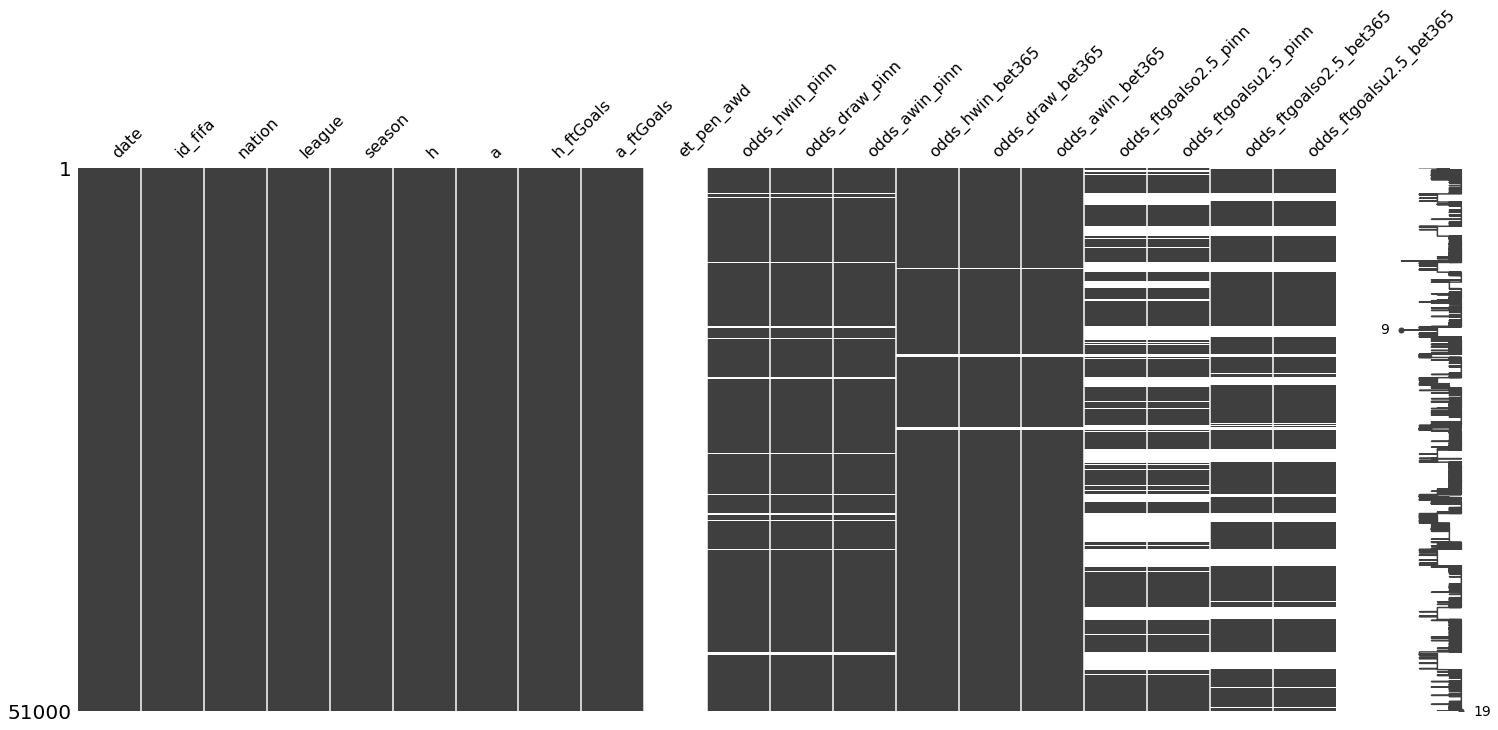

In [20]:
msno.matrix(full_df2)
plt.show();

In [21]:
full_df3 = full_df2.copy(deep=True)
full_df3.drop(columns=['et_pen_awd', 'odds_ftgoalso2.5_pinn', 'odds_ftgoalsu2.5_pinn',
                       'odds_ftgoalso2.5_bet365', 'odds_ftgoalsu2.5_bet365'], inplace=True)

In [22]:
full_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51000 entries, 10295 to 192676
Data columns (total 15 columns):
date                51000 non-null datetime64[ns]
id_fifa             51000 non-null object
nation              51000 non-null object
league              51000 non-null object
season              51000 non-null object
h                   51000 non-null object
a                   51000 non-null object
h_ftGoals           51000 non-null float64
a_ftGoals           51000 non-null float64
odds_hwin_pinn      49512 non-null float64
odds_draw_pinn      49512 non-null float64
odds_awin_pinn      49512 non-null float64
odds_hwin_bet365    50437 non-null float64
odds_draw_bet365    50437 non-null float64
odds_awin_bet365    50437 non-null float64
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 6.2+ MB


In [23]:
for (nation, league, season), seas_df in full_df3.groupby(by=['nation', 'league', 'season']):
    season_df = seas_df.copy(deep=True)
    season_df.sort_values(by=['date'], inplace=True)
    season_df.reset_index(drop=True, inplace=True)
    fn = season + '.csv'
    source = 'indatabet-com'
    save_dir = CLEANED_DIR / source / nation / league / season
    save_fp = save_dir / fn
    save_dir.mkdir(parents=True, exist_ok=True)
    season_df.to_csv(save_fp, index=False)

In [24]:
season_df.head()

,date,id_fifa,nation,league,season,h,a,h_ftGoals,a_ftGoals,odds_hwin_pinn,odds_draw_pinn,odds_awin_pinn,odds_hwin_bet365,odds_draw_bet365,odds_awin_bet365
0,2016-08-06,eng-d1,united-kingdom,one,2016-2017,northampton,fleetwood-town,1.0,1.0,2.26,3.37,3.49,2.30,3.4,3.00
1,2016-08-06,eng-d1,united-kingdom,one,2016-2017,bolton,sheffield-utd,1.0,0.0,2.63,3.33,2.90,2.60,3.4,2.60
2,2016-08-06,eng-d1,united-kingdom,one,2016-2017,southend,gillingham-fc,1.0,3.0,2.28,3.38,3.44,2.20,3.4,3.20
3,2016-08-06,eng-d1,united-kingdom,one,2016-2017,scunthorpe,bristol-rovers,3.0,1.0,2.28,3.38,3.44,2.20,3.4,3.20
4,2016-08-06,eng-d1,united-kingdom,one,2016-2017,swindon,coventry,1.0,0.0,2.97,3.37,2.55,2.88,3.4,2.38


In [25]:
season_df.tail()

,date,id_fifa,nation,league,season,h,a,h_ftGoals,a_ftGoals,odds_hwin_pinn,odds_draw_pinn,odds_awin_pinn,odds_hwin_bet365,odds_draw_bet365,odds_awin_bet365
552,2017-05-04,eng-d1,united-kingdom,one,2016-2017,millwall,scunthorpe,0.0,0.0,2.04,3.55,3.95,2.00,3.5,3.60
553,2017-05-04,eng-d1,united-kingdom,one,2016-2017,bradford,fleetwood-town,1.0,0.0,1.96,3.43,4.48,1.83,3.5,4.33
554,2017-05-07,eng-d1,united-kingdom,one,2016-2017,fleetwood-town,bradford,0.0,0.0,2.76,3.33,2.76,2.60,3.4,2.60
555,2017-05-07,eng-d1,united-kingdom,one,2016-2017,scunthorpe,millwall,2.0,3.0,2.62,3.40,2.86,2.60,3.3,2.63
556,2017-05-20,eng-d1,united-kingdom,one,2016-2017,bradford,millwall,0.0,1.0,2.85,3.22,2.75,2.63,3.2,2.70


In [26]:
season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 15 columns):
date                557 non-null datetime64[ns]
id_fifa             557 non-null object
nation              557 non-null object
league              557 non-null object
season              557 non-null object
h                   557 non-null object
a                   557 non-null object
h_ftGoals           557 non-null float64
a_ftGoals           557 non-null float64
odds_hwin_pinn      557 non-null float64
odds_draw_pinn      557 non-null float64
odds_awin_pinn      557 non-null float64
odds_hwin_bet365    557 non-null float64
odds_draw_bet365    557 non-null float64
odds_awin_bet365    557 non-null float64
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 65.4+ KB


In [27]:
season_df.describe()

,h_ftGoals,a_ftGoals,odds_hwin_pinn,odds_draw_pinn,odds_awin_pinn,odds_hwin_bet365,odds_draw_bet365,odds_awin_bet365
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,1.454219,1.102334,2.511077,3.611400,3.605153,2.379731,3.477612,3.354381
std,1.178405,1.060378,0.800649,0.349283,1.490046,0.661800,0.265385,1.162915
min,0.000000,0.000000,1.220000,3.150000,1.540000,1.250000,3.100000,1.440000
25%,1.000000,0.000000,1.970000,3.420000,2.630000,1.910000,3.400000,2.600000
50%,1.000000,1.000000,2.360000,3.520000,3.220000,2.250000,3.400000,3.100000
75%,2.000000,2.000000,2.830000,3.690000,4.200000,2.630000,3.500000,3.800000
max,5.000000,5.000000,7.510000,7.280000,14.350000,6.500000,6.000000,11.000000


### Test Read

In [28]:
df = pd.read_csv(save_fp, parse_dates=['date'], index_col=None)
df.head()

,date,id_fifa,nation,league,season,h,a,h_ftGoals,a_ftGoals,odds_hwin_pinn,odds_draw_pinn,odds_awin_pinn,odds_hwin_bet365,odds_draw_bet365,odds_awin_bet365
0,2016-08-06,eng-d1,united-kingdom,one,2016-2017,northampton,fleetwood-town,1.0,1.0,2.26,3.37,3.49,2.30,3.4,3.00
1,2016-08-06,eng-d1,united-kingdom,one,2016-2017,bolton,sheffield-utd,1.0,0.0,2.63,3.33,2.90,2.60,3.4,2.60
2,2016-08-06,eng-d1,united-kingdom,one,2016-2017,southend,gillingham-fc,1.0,3.0,2.28,3.38,3.44,2.20,3.4,3.20
3,2016-08-06,eng-d1,united-kingdom,one,2016-2017,scunthorpe,bristol-rovers,3.0,1.0,2.28,3.38,3.44,2.20,3.4,3.20
4,2016-08-06,eng-d1,united-kingdom,one,2016-2017,swindon,coventry,1.0,0.0,2.97,3.37,2.55,2.88,3.4,2.38


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 15 columns):
date                557 non-null datetime64[ns]
id_fifa             557 non-null object
nation              557 non-null object
league              557 non-null object
season              557 non-null object
h                   557 non-null object
a                   557 non-null object
h_ftGoals           557 non-null float64
a_ftGoals           557 non-null float64
odds_hwin_pinn      557 non-null float64
odds_draw_pinn      557 non-null float64
odds_awin_pinn      557 non-null float64
odds_hwin_bet365    557 non-null float64
odds_draw_bet365    557 non-null float64
odds_awin_bet365    557 non-null float64
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 65.4+ KB


In [30]:
stop

NameError: name 'stop' is not defined

In [ ]:
full_df1 = full_df.copy(deep=True)
for col in full_df.columns:
    if col not in ['date', 'id_fifa', 'country', 'league', 'season', 'h', 'a', 'et_pen_awd']:
        print(col)
        full_df1[col] = full_df[col].astype(float)
    
full_df1.info()

In [ ]:
msno.matrix(full_df)
plt.show();

In [ ]:
full_df.drop(columns=[''])

In [ ]:
stop

In [ ]:
df_4[df_4['country'] == 'poland']['league'].unique()

In [ ]:
stop

In [ ]:
odds_df[odds_df['country'] == 'germany']['league'].value_counts()

In [ ]:
odds_df.to_csv(INTERIM_DATA_DIR / 'indatabet-free-odds' / save_file_name, index=False)

In [ ]:
dtypes = {'id_fifa': np.object, 'country': np.object, 'league': np.object,
          'season': np.object, 'h': np.object, 'a': np.object,
          'h_htgoals': np.float64, 'a_htgoals': np.float64,
          'h_ftgoals': np.object, 'a_ftgoals': np.object, 'et_pen_awd': np.object,
          'odds_hwin_pinn': np.float64, 'odds_draw_pinn': np.float64, 'odds_awin_pinn': np.float64,
          'odds_hwin_bet365': np.float64, 'odds_draw_bet365': np.float64, 'odds_awin_bet365': np.float64,
          'odds_ftgoalso2.5_pinn': np.float64, 'odds_ftgoalsu2.5_pinn': np.float64,
          'odds_ftgoalso2.5_bet365': np.float64, 'odds_ftgoalsu2.5_bet365': np.float64}
odds_df = pd.read_csv(INTERIM_DATA_DIR / 'indatabet-free-odds' / save_file_name,
                      parse_dates=['date'], dtype=dtypes, dayfirst=True, index_col=None)
odds_df.head()

In [ ]:
odds_df.info()

In [ ]:
odds_df.describe()